In [1]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,      # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,         # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
)
datagen.fit(X_train)

In [3]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
print("\nStarting ANN model training...")
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=15, # It's good to train for a few more epochs on augmented data
    validation_data=(X_test, y_test)
)
print("Model training finished!")


Starting ANN model training...


c:\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 36ms/step - accuracy: 0.7883 - loss: 0.6666 - val_accuracy: 0.9735 - val_loss: 0.0780
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 34ms/step - accuracy: 0.9446 - loss: 0.1788 - val_accuracy: 0.9842 - val_loss: 0.0465
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9578 - loss: 0.1387 - val_accuracy: 0.9846 - val_loss: 0.0461
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9641 - loss: 0.1154 - val_accuracy: 0.9880 - val_loss: 0.0367
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9687 - loss: 0.1045 - val_accuracy: 0.9887 - val_loss: 0.0346
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 28ms/step - accuracy: 0.9702 - loss: 0.0977 - val_accuracy: 0.9892 - val_loss: 0.0330
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9725 - loss: 0.0898 - val_accuracy: 0.9894 - val_loss: 0.0335
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 114s 41ms/step - accuracy: 0.9744 

In [7]:
print("\nEvaluating model on test data...")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


Evaluating model on test data...
313/313 - 2s - 7ms/step - accuracy: 0.9903 - loss: 0.0336

Test accuracy: 0.9903



Generating learning curve plots...


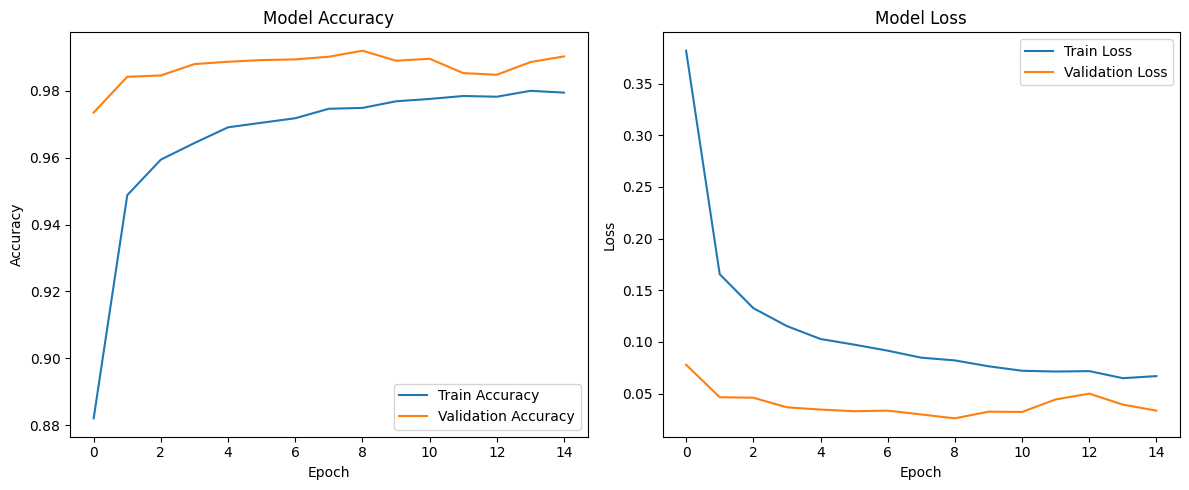

In [8]:
import matplotlib.pyplot as plt

print("\nGenerating learning curve plots...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [9]:
model_filename = 'digit_recognizer_model.keras'
model.save(model_filename)
print(f"\nModel saved successfully as {model_filename}")



Model saved successfully as digit_recognizer_model.keras
